# Worksheet: Facial point prediction
This sheet is to help you understand loading in a dataset, prprocessing and augmentation of data, modelling and predicting, and using this knowledge for fun!



This worksheet was written by Dexter Shepherd, any inquiries please email d.r.shepherd@sussex.ac.uk

In [31]:
# First of all we must import and download all the necessary libraries
import numpy as np #the python maths library 
import cv2 #python computer vision library
import matplotlib.pyplot as plt #so we can visualise easily
import pandas as pd #data processing library

## Part A: Understanding the basics
You might already be confident with Python, so you will breeze through this. But make sure to complete this section, as you will need to understand the basics of image plotting and numpy to continue...

### Numpy
Numpy is the maths library for python. It is much more efficient than using lists, and makes it easier to perform mathematical operations across your data
#### Arrays

In [11]:
#lets make an empty array
boring_array=[0,0,0,0,0,0,0,0,0]
cool_array=np.zeros((9,))

print(boring_array,cool_array)

#now we want to change the first element to 1
boring_array[0]=1
cool_array[0]=1
print("Add one to index:",boring_array,cool_array)

#simple right? WHat if we want to add one to all the items in the array
for i in range(len(boring_array)):
    boring_array[i]+=1
cool_array+=1
print("Add one to add:",boring_array,cool_array)

#now you are starting to see the ease of using numpy... lets look at a better example, what if we want to make sure all items above one are capped to one
for i in range(len(boring_array)):
    if boring_array[i]>1:
        boring_array[i]=1
cool_array[cool_array>1]=1
print("Cap values:",boring_array,cool_array)



[0, 0, 0, 0, 0, 0, 0, 0, 0] [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Add one to index: [1, 0, 0, 0, 0, 0, 0, 0, 0] [1. 0. 0. 0. 0. 0. 0. 0. 0.]
Add one to add: [2, 1, 1, 1, 1, 1, 1, 1, 1] [2. 1. 1. 1. 1. 1. 1. 1. 1.]
Cap values: [1, 1, 1, 1, 1, 1, 1, 1, 1] [1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Matrices
Arrays are one thing, but what about matrices?

In [17]:
#we have already established that numpy is more efficient at doing tasks, lets look at matrices
boring_array=[[1 for i in range(5)] for i in range(5)]
cool_array=np.ones((5,5))
print(boring_array,"\n\n",cool_array)

#gathering elements is exactly the same
print("Items:",boring_array[0][0],cool_array[0][0])
#or gathhering rows
print("Rows:",boring_array[0],cool_array[0])
#what if we gather coloumns
print("Columns:", [boring_array[i][0] for i in range(5)],cool_array[:,0])

#When it gets to more complex operations.... then it gets more efficient to use numpy
#We can also generate random arrays

random_matrix=np.random.random((2,2)) #random decimals
print("Random:",random_matrix)

mean=0
std=0.3
gaussian_matrix=np.random.normal(mean,std,(2,2)) #gaussian (normal distribution)
print("Gaussian:",gaussian_matrix)



[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]] 

 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Items: 1 1.0
Rows: [1, 1, 1, 1, 1] [1. 1. 1. 1. 1.]
Columns: [1, 1, 1, 1, 1] [1. 1. 1. 1. 1.]
Random: [[0.91202515 0.94770147]
 [0.35769791 0.10037891]]
Random: [[-0.43467573 -0.23395845]
 [ 0.13058063  0.02388685]]


### Matplotlib
Matplotlib is the plotting library for making graphs and showing images. It is widely used in the field

#### Showing data
The graph you use will depend on your data, here are some examples

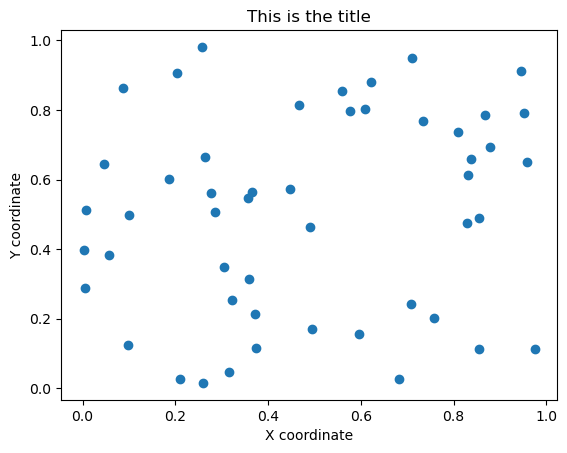

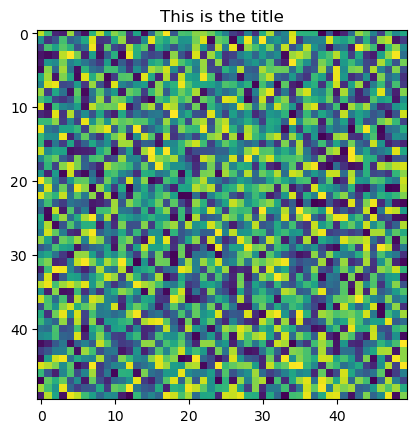

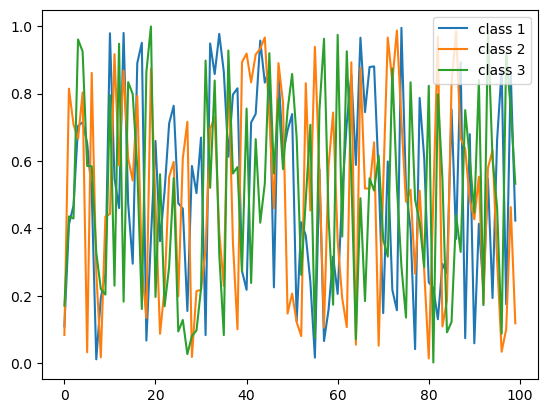

In [30]:
coordinates=np.random.random((50,2)) #stored in format [(x,y),(x,y)]
plt.scatter(coordinates[:,0],coordinates[:,1]) #grab x column and y column
plt.title("This is the title")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.show()

#we can also show images
image=np.random.random((50,50)) #simage of 50 x 50 pixels
plt.imshow(image)
plt.title("This is the title")
plt.show()

#labelling coordinates is another feature
data=np.random.random((100,3)) #3 classes, 100 data points
plt.plot(data,label=["class 1","class 2","class 3"])
plt.legend(loc="upper right")
plt.show()

## Part B: The dataset
A dataset is a collection of related data. For example a collection of pictures of different kinds of flowers would be a dataset. Datasets are not limited to images, they could be readings from a sensor such as weather data. The foundations of machine learning requires data! If you want a model to tell you what the weather will be like in 5 days then you will need a lot of weather data that your model can find patterns in.

The dataset used is from Kaggle https://www.kaggle.com/code/drgilermo/exploring-the-images-and-facial-landmarks/notebook

### Loading in a dataset

In [32]:
# load the dataset
face_images_db = np.load('../dataset/face_images.npz')['face_images']
facial_keypoints_df = pd.read_csv('../dataset/facial_keypoints.csv')

(im_height, im_width, num_images) = face_images_db.shape
num_keypoints = facial_keypoints_df.shape[1] / 2

print('number of images = %d' %(num_images))
print('image dimentions = (%d,%d)' %(im_height,im_width))
print('number of facial keypoints = %d' %(num_keypoints))

number of images = 7049
image dimentions = (96,96)
number of facial keypoints = 15
